In [2]:
from functools import reduce

import matplotlib.ticker
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import torch
_ = torch.set_grad_enabled(False)
import torchmetrics

In [3]:
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")
plt.rc("font", family="sans-serif", size=20)
plt.rc("axes", titlesize=20, labelsize=20)
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)
plt.rc("legend", fontsize=20)
plt.rc("figure", titlesize=20)

In [28]:
#from pathlib import Path
#import csv
#import tqdm

#with open("runs/metrics.csv", "w") as csv_file:
#    csv_writer = csv.writer(csv_file)
#    csv_writer.writerow(["method", "noise_level", "noise_type", "dataset", "loss", "psnr", "ssim"])
#    file_count = sum(1 for _ in Path().parent.joinpath("runs").iterdir())
#    for path in tqdm.notebook.tqdm(Path().parent.joinpath("runs").iterdir(), total=file_count):
#        if not path.is_dir():
#            continue
#        for subpath in path.iterdir():
#            if not subpath.name.startswith("events.out.tfevents") or not subpath.name.endswith(".1"):
#                continue
#            event_acc = EventAccumulator(str(subpath.resolve()))
#            event_acc.Reload()
#            loss = event_acc.Scalars("test/learned_loss" if "test/learned_loss" in event_acc.Tags()["scalars"] else "test/analytic_loss")[-1].value
#            psnr = event_acc.Scalars("test/learned_psnr" if "test/learned_psnr" in event_acc.Tags()["scalars"] else "test/analytic_psnr")[-1].value
#            ssim = event_acc.Scalars("test/learned_ssim" if "test/learned_ssim" in event_acc.Tags()["scalars"] else "test/analytic_ssim")[-1].value
#            csv_writer.writerow(path.name.split("_")+[loss, psnr, ssim])

  0%|          | 0/92 [00:00<?, ?it/s]

In [5]:
ground_truth_elli = torch.load("runs/fbp_none_gauss_elli/test_ground_truth_0.pt").to("cpu")
ground_truth_lodopa = torch.load("runs/fbp_none_gauss_lodopa/test_ground_truth_0.pt").to("cpu")



fbp_high_gauss_elli   = torch.load("runs/fbp_high_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_gauss_lodopa = torch.load("runs/fbp_high_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_uni_elli     = torch.load("runs/fbp_high_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_high_uni_lodopa   = torch.load("runs/fbp_high_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_med_gauss_elli    = torch.load("runs/fbp_med_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_med_gauss_lodopa  = torch.load("runs/fbp_med_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_med_uni_elli      = torch.load("runs/fbp_med_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_med_uni_lodopa    = torch.load("runs/fbp_med_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_gauss_elli    = torch.load("runs/fbp_low_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_gauss_lodopa  = torch.load("runs/fbp_low_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_uni_elli      = torch.load("runs/fbp_low_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_low_uni_lodopa    = torch.load("runs/fbp_low_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
fbp_none_gauss_elli   = torch.load("runs/fbp_none_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
fbp_none_gauss_lodopa = torch.load("runs/fbp_none_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")


tik_high_gauss_elli   = torch.load("runs/tik_high_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_gauss_lodopa = torch.load("runs/tik_high_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_uni_elli     = torch.load("runs/tik_high_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_uni_lodopa   = torch.load("runs/tik_high_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_gauss_elli    = torch.load("runs/tik_med_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_gauss_lodopa  = torch.load("runs/tik_med_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_uni_elli      = torch.load("runs/tik_med_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_uni_lodopa    = torch.load("runs/tik_med_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_gauss_elli    = torch.load("runs/tik_low_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_gauss_lodopa  = torch.load("runs/tik_low_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_uni_elli      = torch.load("runs/tik_low_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_uni_lodopa    = torch.load("runs/tik_low_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
tik_none_gauss_elli   = torch.load("runs/tik_none_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
tik_none_gauss_lodopa = torch.load("runs/tik_none_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")


fft_high_gauss_elli   = torch.load("runs/fft_high_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_high_gauss_lodopa = torch.load("runs/fft_high_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_high_uni_elli     = torch.load("runs/fft_high_uni_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_high_uni_lodopa   = torch.load("runs/fft_high_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_med_gauss_elli    = torch.load("runs/fft_med_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_med_gauss_lodopa  = torch.load("runs/fft_med_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_med_uni_elli      = torch.load("runs/fft_med_uni_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_med_uni_lodopa    = torch.load("runs/fft_med_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_low_gauss_elli    = torch.load("runs/fft_low_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_low_gauss_lodopa  = torch.load("runs/fft_low_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_low_uni_elli      = torch.load("runs/fft_low_uni_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_low_uni_lodopa    = torch.load("runs/fft_low_uni_lodopa/test_learned_reconstruction_0.pt").to("cpu")
fft_none_gauss_elli   = torch.load("runs/fft_none_gauss_elli/test_learned_reconstruction_0.pt").to("cpu")
fft_none_gauss_lodopa = torch.load("runs/fft_none_gauss_lodopa/test_learned_reconstruction_0.pt").to("cpu")


svd_high_gauss_elli   = torch.load("runs/svd_high_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_high_gauss_lodopa = torch.load("runs/svd_high_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_high_uni_elli     = torch.load("runs/svd_high_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_high_uni_lodopa   = torch.load("runs/svd_high_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_gauss_elli    = torch.load("runs/svd_med_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_gauss_lodopa  = torch.load("runs/svd_med_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_uni_elli      = torch.load("runs/svd_med_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_uni_lodopa    = torch.load("runs/svd_med_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_gauss_elli    = torch.load("runs/svd_low_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_gauss_lodopa  = torch.load("runs/svd_low_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_uni_elli      = torch.load("runs/svd_low_uni_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_uni_lodopa    = torch.load("runs/svd_low_uni_lodopa/test_analytic_reconstruction_0.pt").to("cpu")
svd_none_gauss_elli   = torch.load("runs/svd_none_gauss_elli/test_analytic_reconstruction_0.pt").to("cpu")
svd_none_gauss_lodopa = torch.load("runs/svd_none_gauss_lodopa/test_analytic_reconstruction_0.pt").to("cpu")





fbp_high_gauss_trans = fbp_high_gauss_lodopa.clone()
fbp_high_uni_trans   = fbp_high_uni_lodopa.clone()
fbp_med_gauss_trans  = fbp_med_gauss_lodopa.clone()
fbp_med_uni_trans    = fbp_med_uni_lodopa.clone()
fbp_low_gauss_trans  = fbp_low_gauss_lodopa.clone()
fbp_low_uni_trans    = fbp_low_uni_lodopa.clone()
fbp_none_gauss_trans = fbp_none_gauss_lodopa.clone()


tik_high_gauss_trans = torch.load("runs/tik_high_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_high_uni_trans   = torch.load("runs/tik_high_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_gauss_trans  = torch.load("runs/tik_med_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_med_uni_trans    = torch.load("runs/tik_med_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_gauss_trans  = torch.load("runs/tik_low_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_low_uni_trans    = torch.load("runs/tik_low_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
tik_none_gauss_trans = torch.load("runs/tik_none_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")


fft_high_gauss_trans = torch.load("runs/fft_high_gauss_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_high_uni_trans   = torch.load("runs/fft_high_uni_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_med_gauss_trans  = torch.load("runs/fft_med_gauss_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_med_uni_trans    = torch.load("runs/fft_med_uni_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_low_gauss_trans  = torch.load("runs/fft_low_gauss_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_low_uni_trans    = torch.load("runs/fft_low_uni_trans/test_learned_reconstruction_0.pt").to("cpu")
fft_none_gauss_trans = torch.load("runs/fft_none_gauss_trans/test_learned_reconstruction_0.pt").to("cpu")


svd_high_gauss_trans = torch.load("runs/svd_high_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_high_uni_trans   = torch.load("runs/svd_high_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_gauss_trans  = torch.load("runs/svd_med_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_med_uni_trans    = torch.load("runs/svd_med_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_gauss_trans  = torch.load("runs/svd_low_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_low_uni_trans    = torch.load("runs/svd_low_uni_trans/test_analytic_reconstruction_0.pt").to("cpu")
svd_none_gauss_trans = torch.load("runs/svd_none_gauss_trans/test_analytic_reconstruction_0.pt").to("cpu")

In [6]:
all_elli = [
    #fbp_high_gauss_elli,
    #fbp_high_uni_elli,
    #fbp_med_gauss_elli,
    #fbp_med_uni_elli,
    #fbp_low_gauss_elli,
    #fbp_low_uni_elli,
    #fbp_none_gauss_elli,
    tik_high_gauss_elli,
    tik_high_uni_elli,
    tik_med_gauss_elli,
    tik_med_uni_elli,
    tik_low_gauss_elli,
    tik_low_uni_elli,
    tik_none_gauss_elli,
    fft_high_gauss_elli,
    fft_high_uni_elli,
    fft_med_gauss_elli,
    fft_med_uni_elli,
    fft_low_gauss_elli,
    fft_low_uni_elli,
    fft_none_gauss_elli,
    svd_high_gauss_elli,
    svd_high_uni_elli,
    svd_med_gauss_elli,
    svd_med_uni_elli,
    svd_low_gauss_elli,
    svd_low_uni_elli,
    svd_none_gauss_elli
]
vmin_elli = min(reduce(min, map(lambda x: x.min(), all_elli), 0), 0)
vmax_elli = max(reduce(max, map(lambda x: x.max(), all_elli), 1), 1)



all_lodopa = [
    #fbp_high_gauss_lodopa,
    #fbp_high_uni_lodopa,
    #fbp_med_gauss_lodopa,
    #fbp_med_uni_lodopa,
    #fbp_low_gauss_lodopa,
    #fbp_low_uni_lodopa,
    #fbp_none_gauss_lodopa,
    tik_high_gauss_lodopa,
    tik_high_uni_lodopa,
    tik_med_gauss_lodopa,
    tik_med_uni_lodopa,
    tik_low_gauss_lodopa,
    tik_low_uni_lodopa,
    tik_none_gauss_lodopa,
    fft_high_gauss_lodopa,
    fft_high_uni_lodopa,
    fft_med_gauss_lodopa,
    fft_med_uni_lodopa,
    fft_low_gauss_lodopa,
    fft_low_uni_lodopa,
    fft_none_gauss_lodopa,
    svd_high_gauss_lodopa,
    svd_high_uni_lodopa,
    svd_med_gauss_lodopa,
    svd_med_uni_lodopa,
    svd_low_gauss_lodopa,
    svd_low_uni_lodopa,
    svd_none_gauss_lodopa
]
vmin_lodopa = min(reduce(min, map(lambda x: x.min(), all_lodopa), 0), 0)
vmax_lodopa = max(reduce(max, map(lambda x: x.max(), all_lodopa), 1), 1)



all_trans = [
    #fbp_high_gauss_trans,
    #fbp_high_uni_trans,
    #fbp_med_gauss_trans,
    #fbp_med_uni_trans,
    #fbp_low_gauss_trans,
    #fbp_low_uni_trans,
    #fbp_none_gauss_trans,
    tik_high_gauss_trans,
    tik_high_uni_trans,
    tik_med_gauss_trans,
    tik_med_uni_trans,
    tik_low_gauss_trans,
    tik_low_uni_trans,
    tik_none_gauss_trans,
    fft_high_gauss_trans,
    fft_high_uni_trans,
    fft_med_gauss_trans,
    fft_med_uni_trans,
    fft_low_gauss_trans,
    fft_low_uni_trans,
    fft_none_gauss_trans,
    svd_high_gauss_trans,
    svd_high_uni_trans,
    svd_med_gauss_trans,
    svd_med_uni_trans,
    svd_low_gauss_trans,
    svd_low_uni_trans,
    svd_none_gauss_trans
]
vmin_trans = min(reduce(min, map(lambda x: x.min(), all_trans), 0), 0)
vmax_trans = max(reduce(max, map(lambda x: x.max(), all_trans), 1), 1)

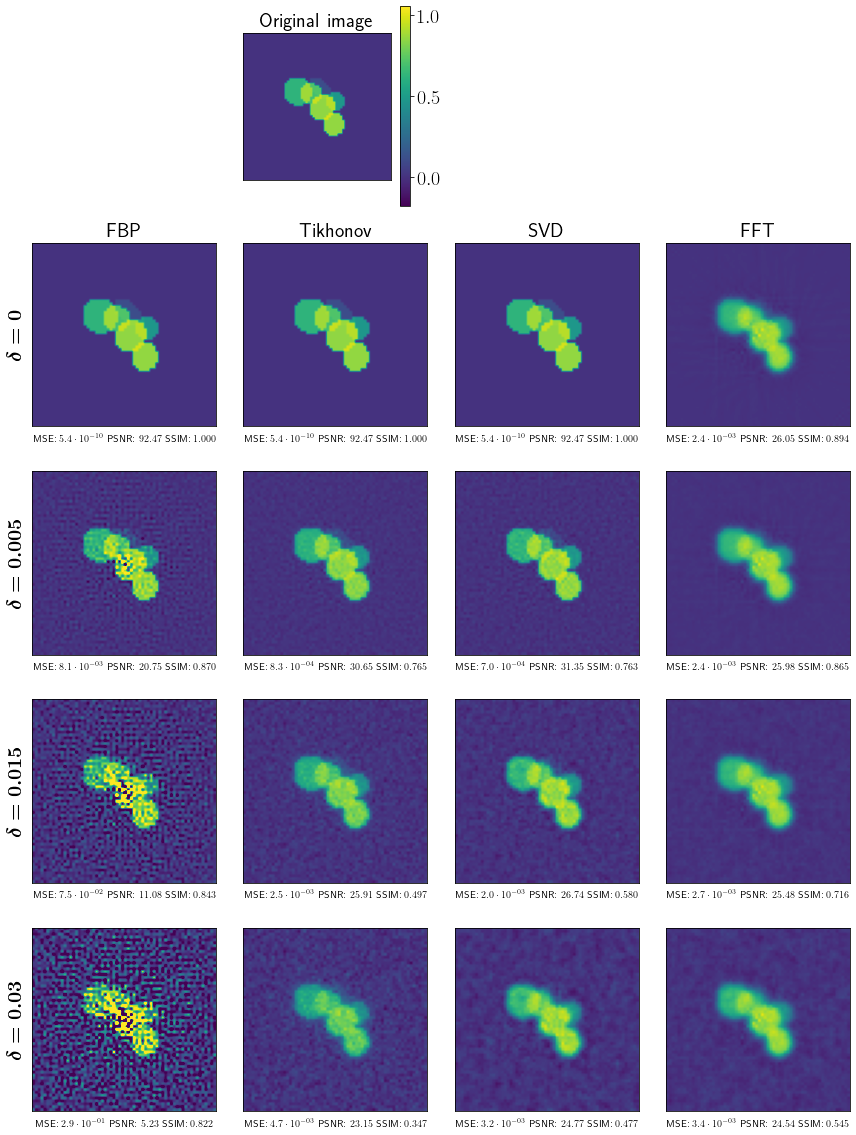

In [7]:
plt.subplots(5,4,figsize=(12,16))
plt.subplot(5,4,1)
plt.axis("off")
plt.subplot(5,4,2)
plt.title("Original image")
plt.imshow(ground_truth_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(5,4,3)
plt.axis("off")
plt.subplot(5,4,4)
plt.axis("off")

plt.subplot(5,4,5)
plt.ylabel("\\boldmath$\\delta = 0$")
plt.title("FBP")
plt.imshow(svd_none_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,6)
plt.title("Tikhonov")
plt.imshow(svd_none_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,7)
plt.title("SVD")
plt.imshow(svd_none_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,8)
plt.title("FFT")
plt.imshow(fft_none_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_none_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,9)
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.imshow(fbp_low_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,10)
plt.imshow(tik_low_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,11)
plt.imshow(svd_low_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,12)
plt.imshow(fft_low_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,13)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,14)
plt.imshow(tik_med_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,15)
plt.imshow(svd_med_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,16)
plt.imshow(fft_med_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,17)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,18)
plt.imshow(tik_high_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,19)
plt.imshow(svd_high_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,20)
plt.imshow(fft_high_gauss_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_gauss_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/elli_gauss.jpg", dpi=300)
plt.show()

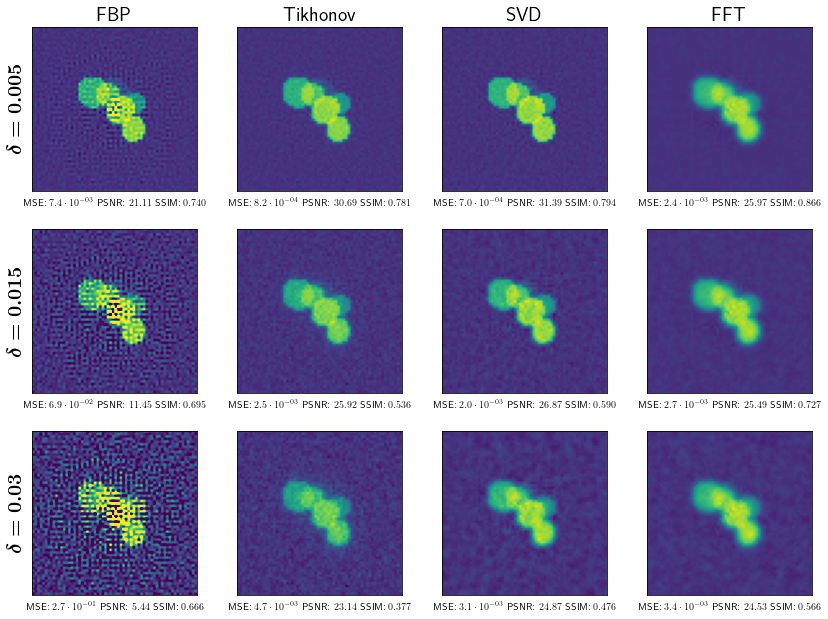

In [32]:
plt.subplots(3,4,figsize=(12,9))
plt.gcf().set_facecolor("white")

plt.subplot(3,4,1)
plt.title("FBP")
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.imshow(fbp_low_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,2)
plt.title("Tikhonov")
plt.imshow(tik_low_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,3)
plt.title("SVD")
plt.imshow(svd_low_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,4)
plt.title("FFT")
plt.imshow(fft_low_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,5)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,6)
plt.imshow(tik_med_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,7)
plt.imshow(svd_med_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,8)
plt.imshow(fft_med_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,9)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,10)
plt.imshow(tik_high_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,11)
plt.imshow(svd_high_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,12)
plt.imshow(fft_high_uni_elli,  vmin=vmin_elli, vmax=vmax_elli)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_uni_elli.unsqueeze(0).unsqueeze(0), ground_truth_elli.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/elli_uni.jpg", dpi=300)
plt.show()

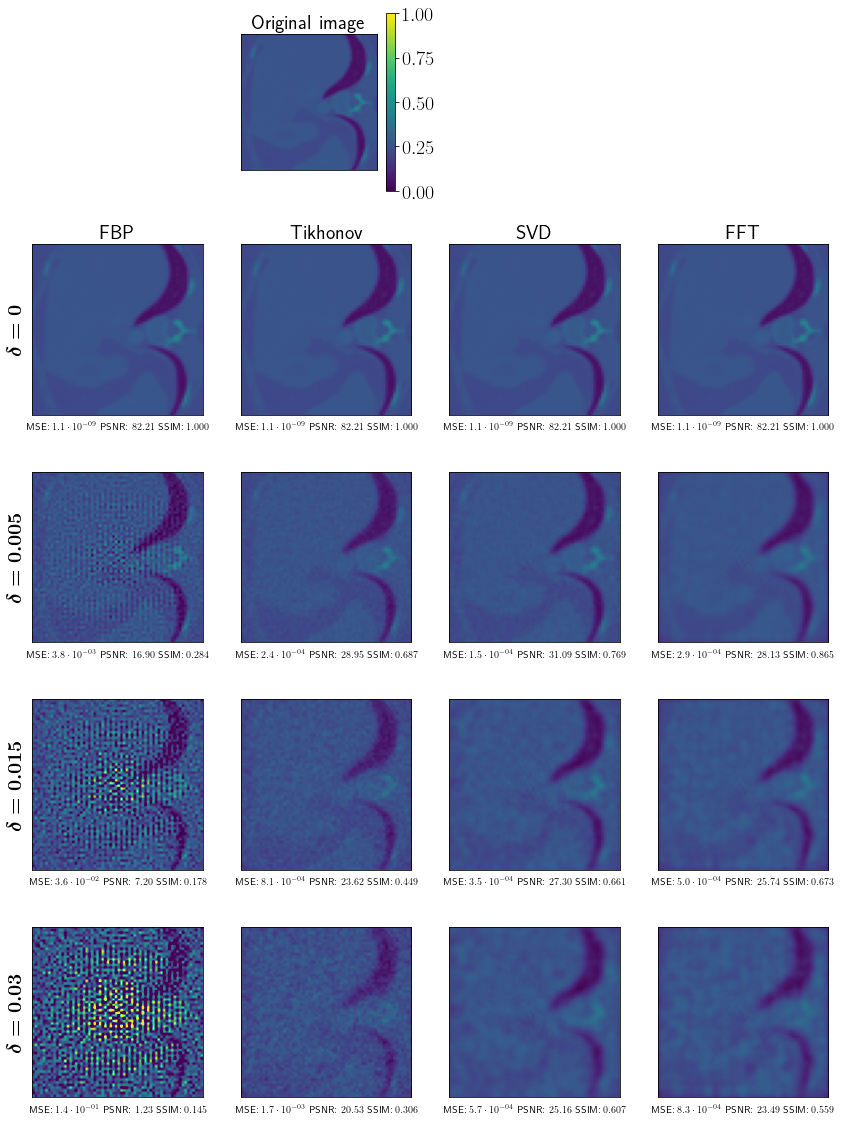

In [33]:
plt.subplots(5,4,figsize=(12,16))
plt.subplot(5,4,1)
plt.axis("off")
plt.subplot(5,4,2)
plt.title("Original image")
plt.imshow(ground_truth_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.colorbar()
plt.subplot(5,4,3)
plt.axis("off")
plt.subplot(5,4,4)
plt.axis("off")

plt.subplot(5,4,5)
plt.ylabel("\\boldmath$\\delta = 0$")
plt.title("FBP")
plt.imshow(svd_none_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,6)
plt.title("Tikhonov")
plt.imshow(svd_none_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,7)
plt.title("SVD")
plt.imshow(svd_none_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_none_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,8)
plt.title("FFT")
plt.imshow(fft_none_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_none_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,9)
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.imshow(fbp_low_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,10)
plt.imshow(tik_low_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,11)
plt.imshow(svd_low_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,12)
plt.imshow(fft_low_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,13)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,14)
plt.imshow(tik_med_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,15)
plt.imshow(svd_med_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,16)
plt.imshow(fft_med_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(5,4,17)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,18)
plt.imshow(tik_high_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,19)
plt.imshow(svd_high_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(5,4,20)
plt.imshow(fft_high_gauss_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_gauss_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/lodopab_gauss.jpg", dpi=300)
plt.show()

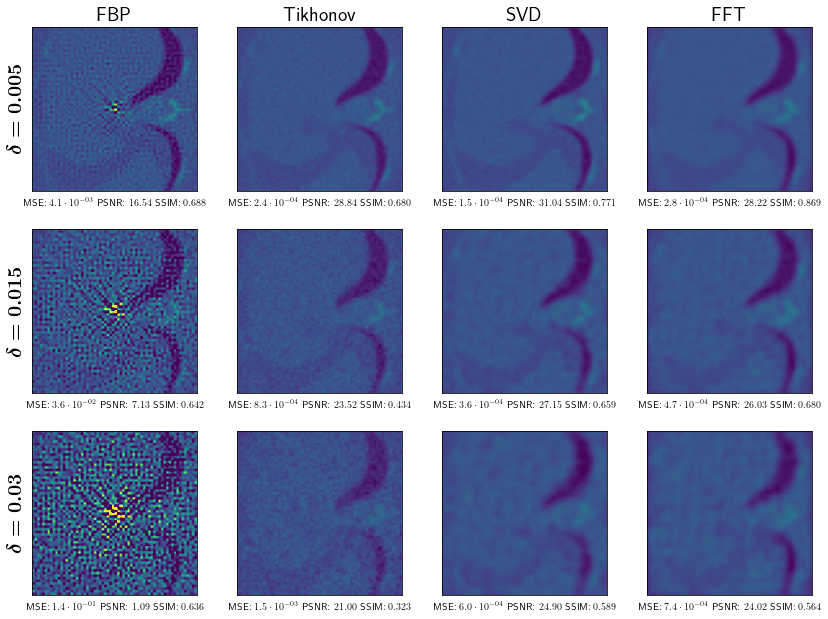

In [34]:
plt.subplots(3,4,figsize=(12,9))
plt.gcf().set_facecolor("white")

plt.subplot(3,4,1)
plt.title("FBP")
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.imshow(fbp_low_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,2)
plt.title("Tikhonov")
plt.imshow(tik_low_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,3)
plt.title("SVD")
plt.imshow(svd_low_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,4)
plt.title("FFT")
plt.imshow(fft_low_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,5)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,6)
plt.imshow(tik_med_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,7)
plt.imshow(svd_med_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,8)
plt.imshow(fft_med_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,9)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,10)
plt.imshow(tik_high_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,11)
plt.imshow(svd_high_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,12)
plt.imshow(fft_high_uni_lodopa,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_uni_lodopa.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/lodopab_uni.jpg", dpi=300)
plt.show()

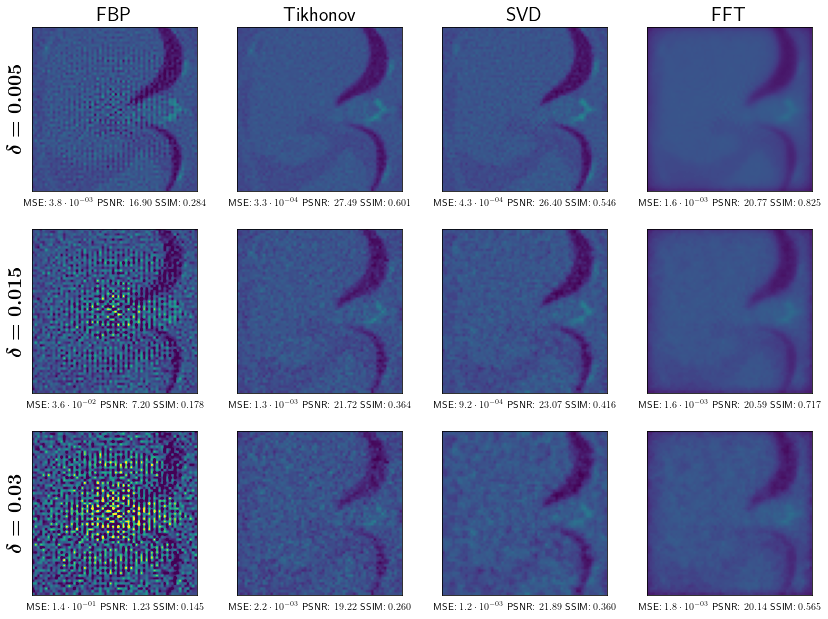

In [35]:
plt.subplots(3,4,figsize=(12,9))
plt.gcf().set_facecolor("white")

plt.subplot(3,4,1)
plt.title("FBP")
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.imshow(fbp_low_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,2)
plt.title("Tikhonov")
plt.imshow(tik_low_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,3)
plt.title("SVD")
plt.imshow(svd_low_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,4)
plt.title("FFT")
plt.imshow(fft_low_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,5)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,6)
plt.imshow(tik_med_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,7)
plt.imshow(svd_med_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,8)
plt.imshow(fft_med_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,9)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,10)
plt.imshow(tik_high_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,11)
plt.imshow(svd_high_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,12)
plt.imshow(fft_high_gauss_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_gauss_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/transfer_gauss.jpg", dpi=300)
plt.show()

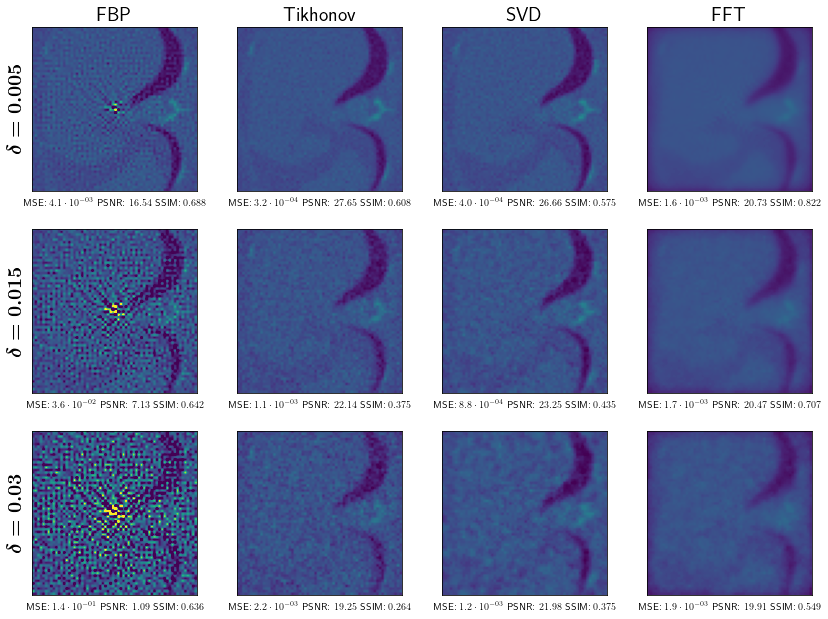

In [36]:
plt.subplots(3,4,figsize=(12,9))
plt.gcf().set_facecolor("white")

plt.subplot(3,4,1)
plt.ylabel("\\boldmath$\\delta = 0.005$")
plt.title("FBP")
plt.imshow(fbp_low_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_low_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,2)
plt.title("Tikhonov")
plt.imshow(tik_low_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_low_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,3)
plt.title("SVD")
plt.imshow(svd_low_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_low_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,4)
plt.title("FFT")
plt.imshow(fft_low_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_low_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,5)
plt.ylabel("\\boldmath$\\delta = 0.015$")
plt.imshow(fbp_med_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_med_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,6)
plt.imshow(tik_med_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_med_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,7)
plt.imshow(svd_med_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_med_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,8)
plt.imshow(fft_med_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_med_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)

plt.subplot(3,4,9)
plt.ylabel("\\boldmath$\\delta = 0.03$")
plt.imshow(fbp_high_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fbp_high_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,10)
plt.imshow(tik_high_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = tik_high_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,11)
plt.imshow(svd_high_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = svd_high_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.subplot(3,4,12)
plt.imshow(fft_high_uni_trans,  vmin=vmin_lodopa, vmax=vmax_lodopa)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.NullLocator())
plt.gca().yaxis.set_major_locator(matplotlib.ticker.NullLocator())
p, t = fft_high_uni_trans.unsqueeze(0).unsqueeze(0), ground_truth_lodopa.unsqueeze(0).unsqueeze(0)
plt.xlabel("MSE: $"+f"{torch.nn.functional.mse_loss(p, t):3.1e}".replace("e", "\\cdot 10^{")+f"}}$   PSNR: ${torchmetrics.functional.peak_signal_noise_ratio(p, t).item():5.2f}$   SSIM: ${torchmetrics.functional.structural_similarity_index_measure(p, t).item():5.3f}$", fontsize=10)
plt.tight_layout()
plt.savefig("runs/transfer_uni.jpg", dpi=300)
plt.show()